# 1. Aggregate Data 

In [1]:
# Required Packages
import pandas as pd

In [2]:
# Source Files 
camera_hub_df = pd.read_csv("data/CameraHubTable.csv", header=0)
camera_df = pd.read_csv("data/CameraTable.csv", header=0)
device_df = pd.read_csv("data/DeviceTable.csv", header=0)
schedule_intervals_df = pd.read_csv("data/ScheduleIntervalsTable.csv", header=0)

In [3]:
# extract Hub records from device_df
hub_mask = device_df["DeviceType"] == "Hub"
device_hub_df = device_df[hub_mask]
device_hub_df.set_index(keys="Id", inplace=True)

# extract Camera records from device_df
camera_mask = device_df["DeviceType"] == "Camera"
device_camera_df = device_df[camera_mask]

#Join Hub and Camera information and append Hub Id to records on camera level
merged_hub_camera_df = device_camera_df.merge(device_hub_df, how="inner", left_on = "ParentId", right_index = True, suffixes=["-device", "-hub"] ).drop(["ScheduleId-device", "ParentId-device", "ParentId-hub", "DeviceType-hub", "DeviceType-device"], axis="columns").rename(index=str, columns={"ParentId": "Hub_Id", "Id": "Camera_Id"})

# join with camera_hub_df to get ServiceType for each each Hub 
merged_device_df = merged_hub_camera_df.merge(camera_hub_df, how="inner", left_on="Hub_Id", right_on="DeviceId" ).drop(["DeviceId", "Id"], axis="columns")

# join with camera_df to get Camera's device model 
merged_device_model_df = merged_device_df.merge(camera_df, how="inner", left_on="Camera_Id", right_on="DeviceId").drop(["DeviceId", "Id"], axis="columns")
merged_device_model_df.set_index(keys="Camera_Id", inplace=True)


In [4]:
# show the aggregated dataframe
merged_device_model_df

,Hub_Id,Name-device,Name-hub,ScheduleId-hub,Location,ServiceType,Model
Camera_Id,,,,,,,
2,1,Cam1,11036Grissomii_1,4.0,Canada,Mobile,GV-VS01
3,1,Cam2,11036Grissomii_1,4.0,Canada,Mobile,GV-EVD2100
4,1,Cam3,11036Grissomii_1,4.0,Canada,Mobile,GV-EVD2100
5,1,Cam4,11036Grissomii_1,4.0,Canada,Mobile,GV-EVD2100
6,1,Cam5,11036Grissomii_1,4.0,Canada,Mobile,GV-EVD2100
7,1,Cam6,11036Grissomii_1,4.0,Canada,Mobile,GV-VD5340
8,1,Cam7,11036Grissomii_1,4.0,Canada,Mobile,GV-BX2500
9,1,Cam8,11036Grissomii_1,4.0,Canada,Mobile,GV-BX5300
10,1,Cam9,11036Grissomii_1,4.0,Canada,Mobile,GV-BX4700


# 2. Fixed service Sites vs. Mobile Service Sites: Chart Camera Models installed

In [5]:
# Required Packages
from matplotlib import pyplot as plt
import numpy as np

# Aggregate Model Installation Data
model_install_data = []
for service_type in merged_device_model_df.ServiceType.unique():
    temp_data = merged_device_model_df[merged_device_model_df['ServiceType'] == service_type]
    for model in temp_data.Model.unique():
        temp_model_data = temp_data[temp_data['Model'] == model]
        model_install_data.append([service_type, model, len(temp_model_data)])
model_install_data = pd.DataFrame(model_install_data, columns=['ServiceType', 'Model', 'Count'])
model_install_data = pd.pivot_table(model_install_data, index='Model', columns='ServiceType', values='Count')

In [6]:
#show the data in dataframe
model_install_data

ServiceType,Fixed,Mobile
Model,,
GV-BX2500,19.0,33.0
GV-BX4700,2.0,11.0
GV-BX5300,2.0,2.0
GV-EVD2100,16.0,4.0
GV-VD5340,2.0,2.0
GV-VS01,4.0,13.0
P3311,7.0,1.0
P3312,6.0,NaN
P3313,5.0,NaN


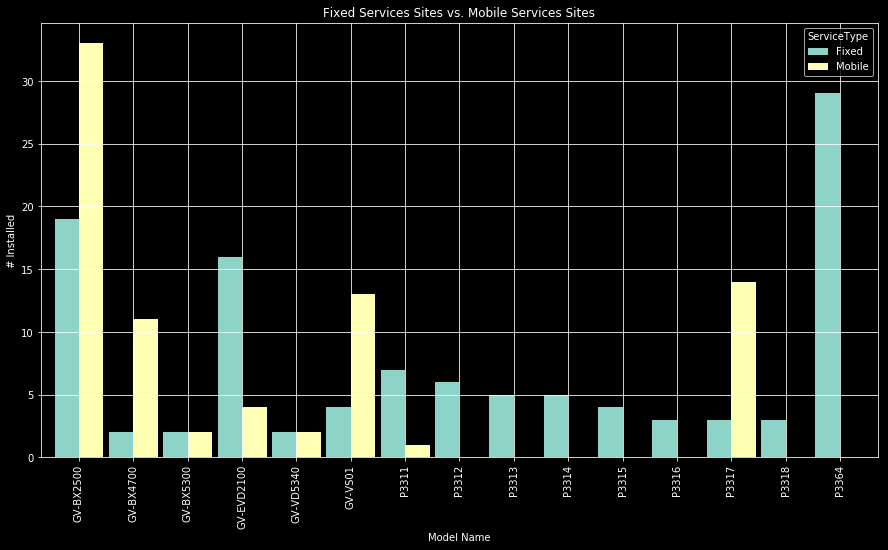

In [7]:
# Chart Camera Models Installed
plt.style.use('dark_background')
model_install_data.plot(kind='bar', figsize=(15, 8), width = 0.9)
plt.xlabel('Model Name')
plt.ylabel('# Installed')
plt.title('Fixed Services Sites vs. Mobile Services Sites')
plt.grid(visible=True)
plt.show()

# 3. Fixed Services Sites vs. Mobile Services Sites: Visualize Differences

In [8]:
# Chart Percent Difference Between Installed Models Across Service Sites
model_install_data['Mobile'].fillna(0, inplace=True)
model_install_data['Difference'] = ((model_install_data['Mobile'] - model_install_data['Fixed']) / (model_install_data['Fixed'])) * 100
#show the data in dataframe
model_install_data

ServiceType,Fixed,Mobile,Difference
Model,,,
GV-BX2500,19.0,33.0,73.684211
GV-BX4700,2.0,11.0,450.000000
GV-BX5300,2.0,2.0,0.000000
GV-EVD2100,16.0,4.0,-75.000000
GV-VD5340,2.0,2.0,0.000000
GV-VS01,4.0,13.0,225.000000
P3311,7.0,1.0,-85.714286
P3312,6.0,0.0,-100.000000
P3313,5.0,0.0,-100.000000


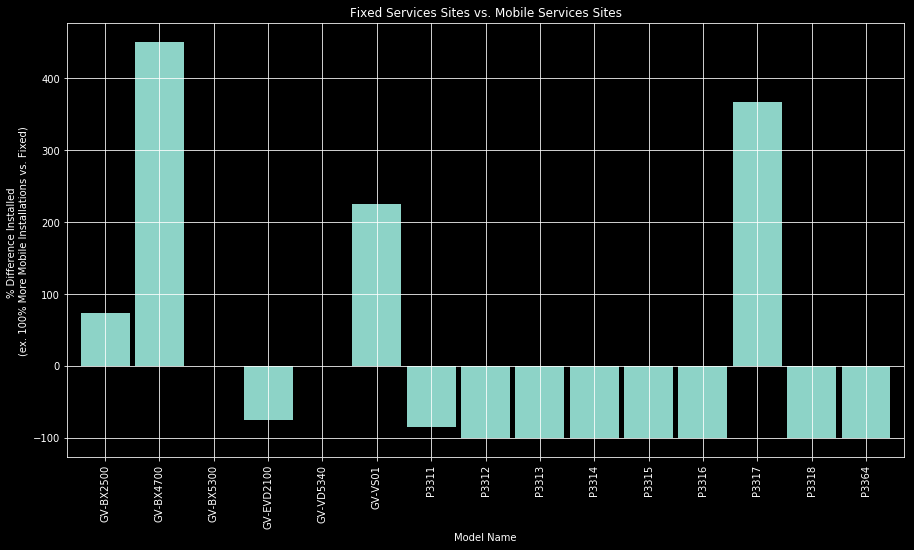

In [152]:
plt.style.use('dark_background')
model_install_data['Difference'].plot(kind='bar', figsize=(15, 8), width = 0.9)
plt.xlabel('Model Name')
plt.ylabel('% Difference Installed \n(ex. 100% More Mobile Installations vs. Fixed)')
plt.title('Fixed Services Sites vs. Mobile Services Sites')
plt.grid(visible=True)
plt.show()

# 4. Visualize Number of Cameras on Monitoring Schedule

In [5]:
# Required Packages
from datetime import datetime

In [6]:
# Get User Requested DateTime
def getUserRequestedDateTime():
    my_start_string = str(input('Enter start date(yyyy-mm-dd hh:mm): '))
    my_start_datetime = datetime.strptime(my_start_string, "%Y-%m-%d %H:%M")
    my_end_string = str(input('Enter end date(yyyy-mm-dd hh:mm): '))
    my_end_datetime = datetime.strptime(my_end_string, "%Y-%m-%d %H:%M")
    return (my_start_datetime, my_end_datetime)

# Get Current Number of Cameras
def get_number_of_current_cameras():
    user_request = getUserRequestedDateTime()
    request_with_matched_wkd = schedule_intervals_df[schedule_intervals_df['daysoftheweek'] == user_request[0].weekday()+1]
    
    # Check Schedule Intervals Based on User Request
    matched_schedule_id = []
    for start in request_with_matched_wkd['starttime'].unique():
        starttime = pd.to_datetime(start).time().hour
        temp = request_with_matched_wkd[request_with_matched_wkd['starttime'] == start]
        for end in temp['endtime'].unique():
            endtime = pd.to_datetime(end).time().hour
            if(user_request[0].time().hour >= starttime and user_request[0].time().hour <= endtime):
                append_data = request_with_matched_wkd['MonitoringScheduleId'][request_with_matched_wkd['starttime'] == start]
                for i in append_data:
                    matched_schedule_id.append(i)
                    
    num_scheduled = 0
    for scheduleid in matched_schedule_id:
        num_scheduled += len(merged_device_model_df['ScheduleId-hub'][merged_device_model_df['ScheduleId-hub'] == scheduleid])
        
    print(f"Matched schedule id : {matched_schedule_id}")
    print(f"Number of scheduled cameras: {num_scheduled}")



In [14]:
# Enter start date(yyyy-mm-dd hh:mm): 2021-09-05 13:00
# Enter end date(yyyy-mm-dd hh:mm): 2021-09-05 14:00
get_number_of_current_cameras()

Enter start date(yyyy-mm-dd hh:mm): 2021-09-05 13:00
Enter end date(yyyy-mm-dd hh:mm): 2021-09-05 14:00
Matched schedule id : [4]
Number of scheduled cameras: 60


In [9]:
# Enter start date(yyyy-mm-dd hh:mm): 2021-09-08 00:00
# Enter end date(yyyy-mm-dd hh:mm): 2021-09-08 23:59
get_number_of_current_cameras()

Enter start date(yyyy-mm-dd hh:mm): 2021-09-08 00:00
Enter end date(yyyy-mm-dd hh:mm): 2021-09-08 23:59
Matched schedule id : [3, 4]
Number of scheduled cameras: 90


In [8]:
# Enter start date(yyyy-mm-dd hh:mm): 2021-09-09 00:00
# Enter end date(yyyy-mm-dd hh:mm): 2021-09-09 23:59
get_number_of_current_cameras()

Enter start date(yyyy-mm-dd hh:mm): 2021-09-09 00:00
Enter end date(yyyy-mm-dd hh:mm): 2021-09-09 23:59
Matched schedule id : [4]
Number of scheduled cameras: 60
